#### Tristan Jones, Susan Aryal, Suraj Bhatta
#### PS:1486089, 1899326, 1879303
#### Group 22
#### Group Project Classification: Final Submission

# Preprocessing

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.evaluate import BootstrapOutOfBag
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [2]:
address = 'heart_failure.csv'
df = pd.read_csv(address)
#df = df.drop(['time'], axis=1)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Feature Types-
* Categorical:
    * Anaemia
    *    Diabetes
    *    High Blood Pressure
    *    Sex
    *    Smoking
* Continuous:
    *    Age
    *    Creatinine Phosphokinase
    *    Ejection Fraction
    *    Platelets
    *    Serum Creatinine
    *    Serum sodium

## Categorical Information
#### Sex: Female = 0, Male = 1
#### Diabetes: Non-Diabetic = 0, Diabetic = 1
#### Anaemia: Non-Anaemic = 0, Anaemic =  1
#### High_blood_pressure: No = 0, Yes = 1
#### Smoking: Non-Smoker = 0, Smoker = 1
#### DEATH_EVENT: Non-Death 0, Death = 1

# Data Cleaning

## Checking and storing column names

In [3]:
col_names = df.columns.values
print(col_names)

['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time' 'DEATH_EVENT']


## Checking datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Checking for missing values 

In [5]:
df.isna().head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### There are no missing values found in the dataset


## Creating Train and Test set

In [7]:
# First we choose our features with Ejection_fraction, serum_creatinine, and serum_sodium since they have high correlation with the DEATH_EVENT.
#X = df.drop(['DEATH_EVENT'], axis=1)
X = df[['ejection_fraction', 'serum_creatinine', 'serum_sodium']]
# Our label is DEATH_EVENT
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

## Counting Bins

In [8]:
np.bincount(y)

array([203,  96])

In [9]:
np.bincount(y_train)

array([150,  59])

In [10]:
np.bincount(y_test)

array([53, 37])

# Descriptive Statistics

In [11]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Interpretation from the statistics:
#### Average age in the data set is around 61 years old with the youngest being 40 and the oldest being 95.
#### The standard deviation of the age is 11.89.
#### Average creatinine phosphokinase is around 582 ranging from 23 to 7861.
#### Average ejection factor is found to be around 38 which can go as much as 80 or as low as 14.
#### The average of serum creatinine level and serum sodium is 1.39 and 136.63 respectively.

## Calculating the correlation of each categorical features with the Death Event

In [12]:
print("Death and male correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["sex"] == 1].value_counts(normalize = True)[1]*100))
print("Death and female correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["sex"] == 0].value_counts(normalize = True)[1]*100))

Death and male correlation percentage: 31.96%
Death and female correlation percentage: 32.38%


In [13]:
print("Death and smoker correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["smoking"] == 1].value_counts(normalize = True)[1]*100))
print("Death and non-smoker correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["smoking"] == 0].value_counts(normalize = True)[1]*100))

Death and smoker correlation percentage: 31.25%
Death and non-smoker correlation percentage: 32.51%


In [14]:
print("Death and diabetic correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["diabetes"] == 1].value_counts(normalize = True)[1]*100))
print("Death and non-diabetic correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["diabetes"] == 0].value_counts(normalize = True)[1]*100))

Death and diabetic correlation percentage: 32.00%
Death and non-diabetic correlation percentage: 32.18%


In [15]:
print("Death and anaemic correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["anaemia"] == 1].value_counts(normalize = True)[1]*100))
print("Death and non-anaemic correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["anaemia"] == 0].value_counts(normalize = True)[1]*100))

Death and anaemic correlation percentage: 35.66%
Death and non-anaemic correlation percentage: 29.41%


In [16]:
print("Death and high blood pressure correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["high_blood_pressure"] == 1].value_counts(normalize = True)[1]*100))
print("Death and non-high blood pressure correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["high_blood_pressure"] == 0].value_counts(normalize = True)[1]*100))

Death and high blood pressure correlation percentage: 37.14%
Death and non-high blood pressure correlation percentage: 29.38%


## Findings from the correlation calculation:
#### There is high correlation percentage in dead patients that were Aneamic and have high blood pressure.
#### Female have a slightly higher death rate than males.
#### Although odd, non-smokers have a slightly higher death rate than smokers. 
#### The diabetic and non-diabietic ones tend to have almost same death rates. 

# Feature vs Death
### Comparing each feature with our label: Death Event and visualizing the statistics.

## Age vs Death

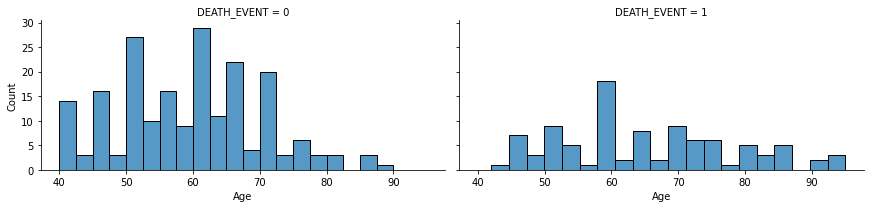

In [17]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'age', bins = 20)
g.set_axis_labels("Age", "Count")


#### Among the dead ones, the number of people dead is significantly large for age around 60 compared to other age groups.

## Anemia vs Death

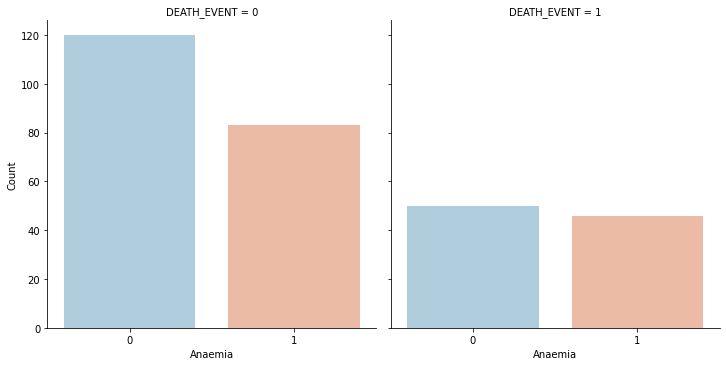

In [18]:
g = sns.catplot(x="anaemia", kind="count", palette="RdBu_r", data=df, col="DEATH_EVENT")
g.set_axis_labels("Anaemia", "Count")

#### There is not much difference in the number of anemic and non-anemic people who are dead.

## Creatinine Phosphokinase vs Death

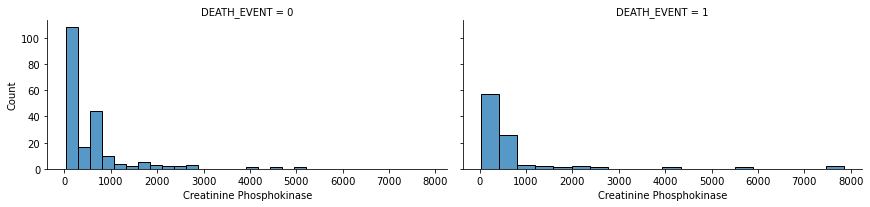

In [19]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'creatinine_phosphokinase', bins = 20)
g.set_axis_labels("Creatinine Phosphokinase", "Count")

#### Almost all poeple had the creatinine phosphokinase level ranging from 0 to 1000 while the maximum value is 7861 which suggests us we have some outliers. The minimum value is 23 and the standard deviation is 970.29.

## Diabetes  vs Death

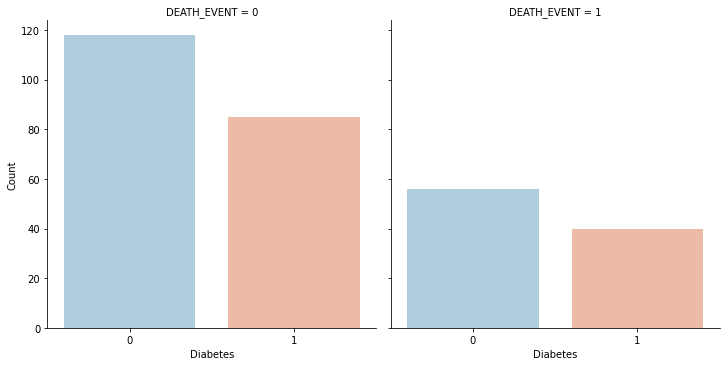

In [20]:
g = sns.catplot(x="diabetes", kind="count", palette="RdBu_r", data=df, col="DEATH_EVENT")
g.set_axis_labels("Diabetes", "Count")

#### The diabetic and non-diabietic ones tend to have almost same death rates but our sample (dataset) has slightly more non-diabetic people than diabetic ones.

## Ejection Fraction vs Death

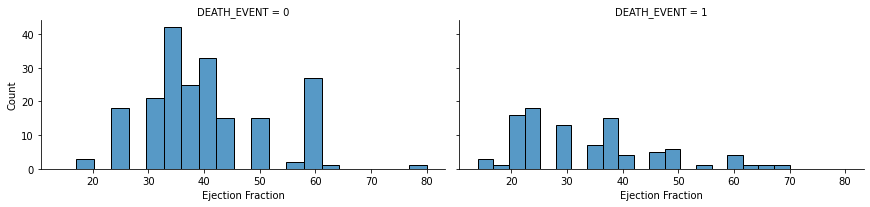

In [21]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'ejection_fraction', bins = 20)
g.set_axis_labels("Ejection Fraction", "Count")

#### The lower ejection factor resulted in death event while the non-dead ones have higher ejection factor.

## High Blood Pressure vs Death

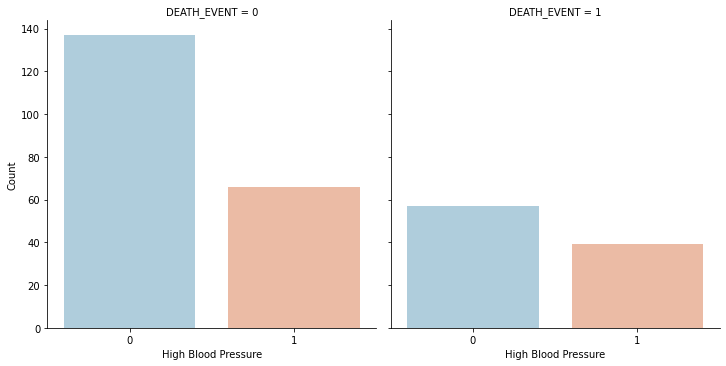

In [22]:
g = sns.catplot(x="high_blood_pressure", kind="count", palette="RdBu_r", data=df, col="DEATH_EVENT")
g.set_axis_labels("High Blood Pressure", "Count")

#### Since there is high correlation percentage in dead patients that had high blood pressure, the most poeple with low blood pressure are not dead.

## Platelets vs Death

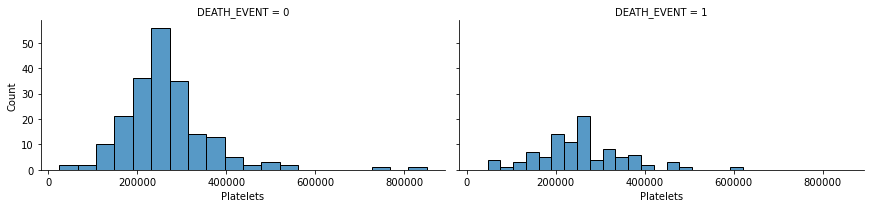

In [23]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'platelets', bins = 20)
g.set_axis_labels("Platelets", "Count")

#### From the dataset, the number of platelets is at the peak around 20000 to 400000. Some poeple had much higher number of platelets b ut that doesn't really determine the death event.

## Serum Creatinine vs Death

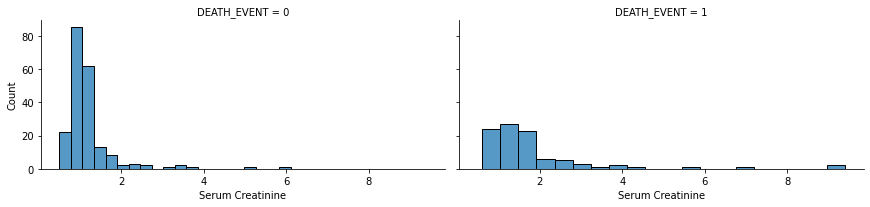

In [24]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'serum_creatinine', bins = 20)
g.set_axis_labels("Serum Creatinine", "Count")

#### The people with higher number of serum creatinine tentatively have less number of deaths than those with the lower number of serum creatinine

## Serum Sodium vs Death

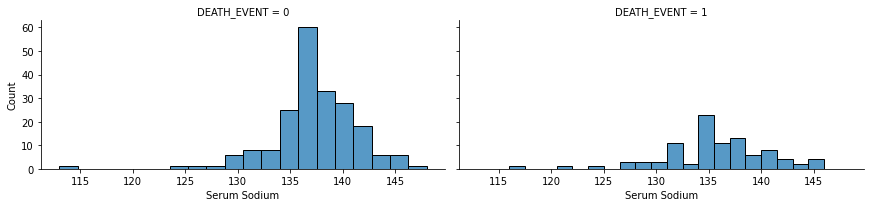

In [25]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'serum_sodium', bins = 20)
g.set_axis_labels("Serum Sodium", "Count")

#### The level of Serum Sodium doesn't really have much effect on the death event. Our sample has the data with serum sodum level mostly close to the range 135-140. The average is 136.63

## Sex vs Death

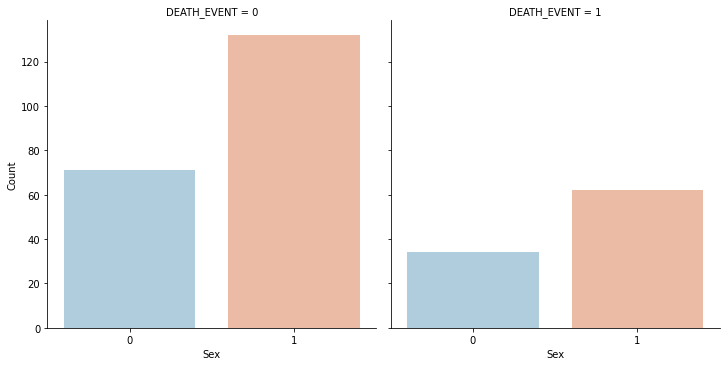

In [26]:
g = sns.catplot(x="sex", kind="count", palette="RdBu_r", data=df, col="DEATH_EVENT")
g.set_axis_labels("Sex", "Count")

#### The number of males in the dataset is higher than the females, however percentage wise, females have a higher death rate

## Smoking vs Death

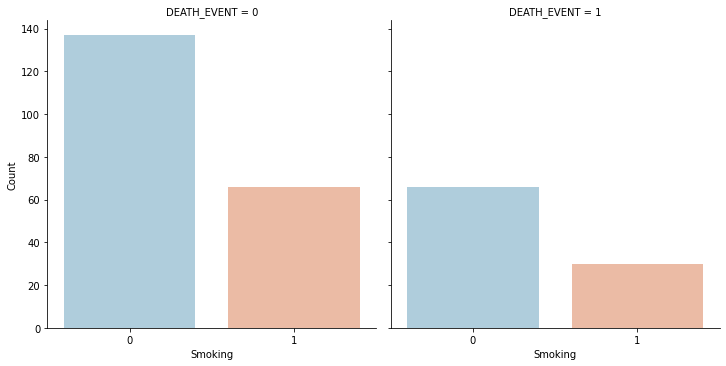

In [27]:
g = sns.catplot(x="smoking", kind="count", palette="RdBu_r", data=df, col="DEATH_EVENT")
g.set_axis_labels("Smoking", "Count")

#### Although it seems odd, the poeple who don't smoke have a slightly higher death rate those who smoke.

# Holdout method and repeated sampling

<strong>Here, we use the Holdout Method to evaluate our classifier.
We are using K-Neighbors Classifier with 5 number of neighbors.
The sampling of the dataset is repeated num_of_neighbors = 5 times.

In [28]:
clf_1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)

<strong>Now, training and testing data are selected with a random seed and plotting the repition and accuracy. <br>
    This time, we take 50% of data for testing and 50% for training.
    Next time, we take different testing data and training data. 

Average: 72.79%


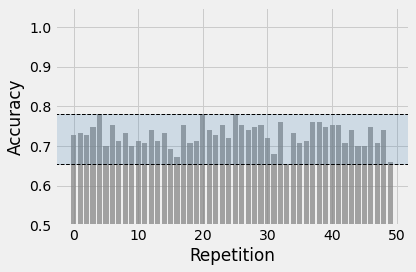

In [29]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]
pred_2 = []

for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i, stratify=y)
    y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
    y_pred_i_acc = np.mean(y_test == y_pred_i)
    pred_2.append(y_pred_i_acc)
pred_2 = np.asarray(pred_2)
print('Average: %.2f%%' % (pred_2.mean()*100))
with plt.style.context(('fivethirtyeight')):
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1.05])
    plt.tight_layout()
    plt.show()


<strong>From the visualization above, the accuracy roughly lies between 65% to 78% and we have the average accuracy 72.79%

<strong> Now, we change the test size to 10% and train data size to 90% train data. This way we will observe the variation of the accuracies along the repititions.

Average: 69.93%


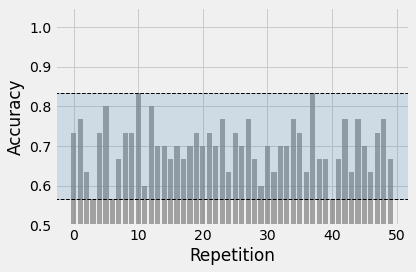

In [30]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]
pred_2 = []
for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i, stratify=y)
    y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
    y_pred_i_acc = np.mean(y_test == y_pred_i)
    pred_2.append(y_pred_i_acc)
pred_2 = np.asarray(pred_2)
print('Average: %.2f%%' % (pred_2.mean()*100))

with plt.style.context(('fivethirtyeight')):
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('Accuracy')
    plt.ylim(0.5, 1.05)
    plt.tight_layout()
    plt.show()


<strong>Observing the chart above, the average accuracy is now 69.93%.<br>
So, we can get higher accuracy when we have bigger test data size than only 10%.<br>
    So using big amount of test data can lead to higher accuracy.      

# Pessimistic Bias in Holdout

In [31]:
from sklearn.preprocessing import StandardScaler

# Now we choose our features by dropping the DEATH_EVENT.
X = df.drop(['DEATH_EVENT'], axis=1)
X = pd.DataFrame(StandardScaler().fit_transform(X))
# Our label is DEATH_EVENT
y = df['DEATH_EVENT']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123, stratify=y)

print('Number of train examples:', y_train.shape[0])
print('Number of test examples:', y_test.shape[0])
print('Labels:', y_train)

Number of train examples: 209
Number of test examples: 90
Labels: 253    0
182    1
274    0
73     0
6      1
      ..
74     1
104    0
173    0
79     0
103    0
Name: DEATH_EVENT, Length: 209, dtype: int64


<strong> Now, applying the LogisticRegression classifier on the dataset and fitting the training data in many iterations to find the avrage accuracy.

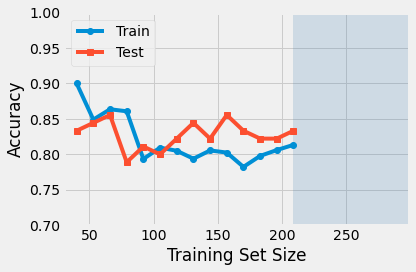

In [32]:
clf_2 = LogisticRegression()

pred_train, pred_test = [], []
intervals = np.arange(40, X_train.shape[0] + 1,13)
#print(intervals)
for i in intervals:
    clf_2.fit(X_train[:i], y_train[:i])
    p_train = clf_2.score(X_train[:i], y_train[:i])
    p_test = clf_2.score(X_test, y_test)
    pred_train.append(p_train)
    pred_test.append(p_test)

with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([30, X_train.shape[0] + X_test.shape[0]])
    plt.axvspan(X_train.shape[0],
                X_train.shape[0] + X_test.shape[0],
                alpha=0.2,
                color='steelblue')
    plt.ylim([0.7, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()

<strong>Interpretation: Looking at the graph above we can conclude that the accuracy of the model lowers when the size of the training set gets bigger.

<strong>
Now, this time we are taking 100 n_estimators, that means we want to build 100 trees before taking maximum voting or averagess of predictions. More number of trees gives us better prediction but since we are doing so many iterations, the time complexity increases overall.

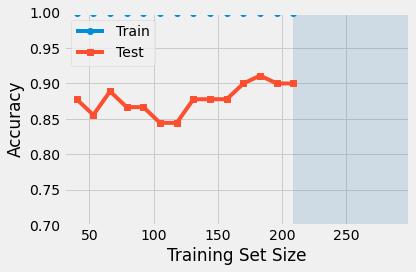

In [33]:

clf_2 = RandomForestClassifier(n_estimators=100, random_state=123)

pred_train, pred_test = [], []
intervals = np.arange(40, X_train.shape[0] + 1,13)

for i in intervals:
    clf_2.fit(X_train[:i], y_train[:i])
    p_train = clf_2.score(X_train[:i], y_train[:i])
    p_test = clf_2.score(X_test, y_test)
    pred_train.append(p_train)
    pred_test.append(p_test)
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([30, X_train.shape[0] + X_test.shape[0]])
    plt.axvspan(X_train.shape[0],
                X_train.shape[0] + X_test.shape[0],
                alpha=0.2,
                color='steelblue')
    plt.ylim([0.7, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()

<strong> From the graph above, the accuracy has improved about 5% more. From this we can say that increasing the number of trees to make the predictions in RandomForestClassifier increase the accuracy of the model.

<strong>When we use KNeighboursClassifier, the sample input consists of k closest training examples in the feature space. We use it on the normalized data to improve the accuracy. KNN has strong consistency results.

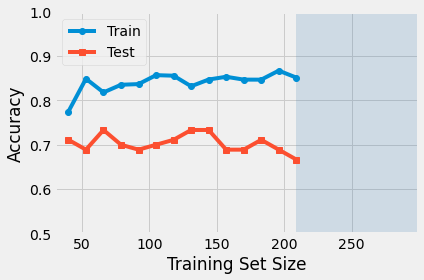

In [34]:
clf_2 = KNeighborsClassifier(n_neighbors=3)
pred_train, pred_test = [], []
intervals = np.arange(40, X_train.shape[0] + 1,13)
for i in intervals:
    clf_2.fit(X_train[:i], y_train[:i])
    p_train = clf_2.score(X_train[:i], y_train[:i])
    p_test = clf_2.score(X_test, y_test)
    pred_train.append(p_train)
    pred_test.append(p_test)

with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([30, X_train.shape[0] + X_test.shape[0]])
    plt.axvspan(X_train.shape[0],
                X_train.shape[0] + X_test.shape[0],
                alpha=0.2,
                color='steelblue')
plt.ylim([0.5, 1.0])
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.tight_layout()

<strong>From the graph above, we can interpret that there is not significant difference in accuracy when different train size data are used.

# Bootstrapping with the KNeighborsClassifier

<strong>Bootstrapping with the KNeighborsClassifier. Bootstrapping is when we replicate the sample, thousand, sometime zillion times of the sample set. first we begin with small size sample data and then randomly iterate over our bootstrap data to find out proportions.

In [35]:
# First we choose our features with Ejection_fraction, serum_creatinine, and serum_sodium since they have high correlation with the DEATH_EVENT.
#X = df.drop(['DEATH_EVENT'], axis=1)
X = df[['ejection_fraction', 'serum_creatinine', 'serum_sodium']]
# Our label is DEATH_EVENT
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

rng = np.random.RandomState(seed=12345)

clf = KNeighborsClassifier(n_neighbors=3, weights = 'uniform', algorithm='kd_tree', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)
#print(np.array(y))
idx = np.arange(y.shape[0])

accuracies = []

for i in range(200):
    train_idx = np.array(rng.choice(idx, size=idx.shape[0], replace=True))
    test_idx = np.setdiff1d(idx, train_idx, assume_unique=False)
    
    
    #print(X.iloc[train_idx])
    
    boot_train_X, boot_train_y = X.iloc[train_idx], y.iloc[train_idx]
    boot_test_X, boot_test_y = X.iloc[test_idx], y.iloc[test_idx]
    
    clf.fit(boot_train_X, boot_train_y)
    acc = clf.score(boot_test_X, boot_test_y)
    accuracies.append(acc)

<strong> Now we calculate the average accuracies and plot the accuracies in the histogram.

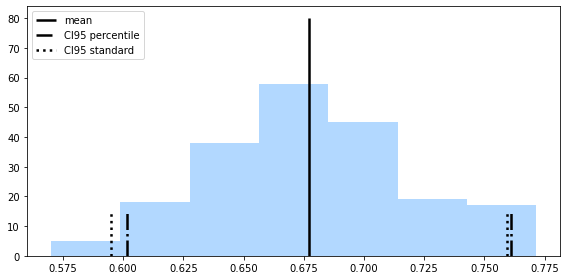

In [37]:
mean = np.mean(accuracies)

se = np.sqrt((1. / (200-1)) * np.sum([(acc - mean) ** 2 for acc in accuracies]))
ci = 1.97 * se

lower = np.percentile(accuracies, 2.5)
upper = np.percentile(accuracies, 97.5)

fig, ax = plt.subplots(figsize=(8,4))
ax.vlines(mean, [0], 80, lw=2.5, linestyle='-', label = 'mean')
ax.vlines(lower, [0], 15, lw=2.5, linestyle='-.', label = 'CI95 percentile')
ax.vlines(upper, [0], 15, lw=2.5, linestyle='-.')

ax.vlines(mean + ci, [0], 15, lw=2.5, linestyle=':', label = 'CI95 standard')
ax.vlines(mean - ci, [0], 15, lw=2.5, linestyle=':')

ax.hist(accuracies, bins=7, color='#0080ff', edgecolor='none', alpha=0.3)
plt.legend(loc='upper left')

#plt.xlim([0.86, 1.01])
plt.tight_layout()

plt.show()

<strong>We can observe front the histogram that the mean accuracy is almost 70% when we do the bootstrapping with KNeighbors Classifier.

# Now using the LogisticRegression

<strong>After RandomForest and KMeans Classifiers, we now use Logistic Regression as another method of classifier. 

In [38]:
# First we choose our features by dropping the DEATH_EVENT.
X = df.drop(['DEATH_EVENT'], axis=1)
#X = df[['ejection_fraction', 'serum_creatinine', 'serum_sodium']]
# Our label is DEATH_EVENT
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [39]:
from sklearn.linear_model import LogisticRegression

rng = np.random.RandomState(seed=12345)

clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.000001, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=12, solver='lbfgs', max_iter=1000, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=1)

idx = np.arange(y.shape[0])

accuracies = []

for i in range(200):
    train_idx = np.array(rng.choice(idx, size=idx.shape[0], replace=True))
    test_idx = np.setdiff1d(idx, train_idx, assume_unique=False)
    
    
    boot_train_X, boot_train_y = X.iloc[train_idx], y.iloc[train_idx]
    boot_test_X, boot_test_y = X.iloc[test_idx], y.iloc[test_idx]
    
    clf.fit(boot_train_X, boot_train_y)
    acc = clf.score(boot_test_X, boot_test_y)
    accuracies.append(acc)

<strong>Now we calculate the average accuracies and plot the accuracies in the histogram.

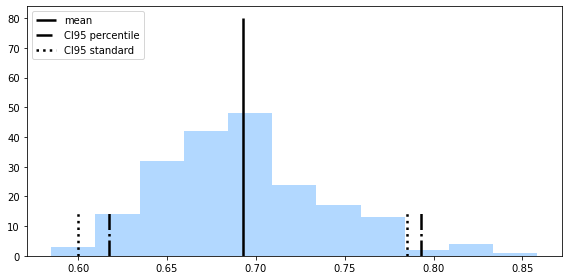

In [40]:
mean = np.mean(accuracies)

se = np.sqrt((1. / (200-1)) * np.sum([(acc - mean) ** 2 for acc in accuracies]))
ci = 1.97 * se

lower = np.percentile(accuracies, 2.5)
upper = np.percentile(accuracies, 97.5)

fig, ax = plt.subplots(figsize=(8,4))
ax.vlines(mean, [0], 80, lw=2.5, linestyle='-', label = 'mean')
ax.vlines(lower, [0], 15, lw=2.5, linestyle='-.', label = 'CI95 percentile')
ax.vlines(upper, [0], 15, lw=2.5, linestyle='-.')

ax.vlines(mean + ci, [0], 15, lw=2.5, linestyle=':', label = 'CI95 standard')
ax.vlines(mean - ci, [0], 15, lw=2.5, linestyle=':')

ax.hist(accuracies, bins=11, color='#0080ff', edgecolor='none', alpha=0.3)
plt.legend(loc='upper left')

#plt.xlim([0.885, 0.922])
plt.tight_layout()

plt.show()

<strong>Here, we can observe front the histogram that the mean accuracy of LogisticRegression is again almost 70% which is similar to that of KNeighbors Classifier.

# Out of Bag Bootstrapping

<strong>In earlier versions, we used the training data and test data. In out of bag Bootstrap, we select the data (x, y) that are not included after the original dataset is run in classifiers that has number of trees. Out-of-bag error can show accurate result as using the test set of same size as the training set.

We implement the out of bag Bootstrap to see the accuracy outcomes too.

In [41]:
# Splitting the data into train and test dataset.
oob = BootstrapOutOfBag(n_splits=3)
for train, test in oob.split(np.array([1, 2, 3, 4, 5])):
    print(train, test)


[0 1 1 0 0] [2 3 4]
[4 1 0 1 2] [3]
[3 1 1 3 0] [2 4]


<strong>Setting X as having attributes of ejection_Fraction, serium_creatinine, and serum_sodium. These attributes are significant to decide on the DEATH EVENT.

In [42]:
X = df[['ejection_fraction', 'serum_creatinine', 'serum_sodium']]
#X = df.drop(['DEATH_EVENT', 'time'], axis=1)
y = df[['DEATH_EVENT']]

model = DecisionTreeClassifier()

<strong> We now find the cross validation score with kfold, k = 5 to estimate the skill of the model on new data.

In [43]:
cv_scores = cross_val_score(model, X, y, cv=5)
print('CV scores', cv_scores)
print('Mean CV score', np.mean(cv_scores))
print('CV score Std', np.std(cv_scores))


CV scores [0.58333333 0.65       0.63333333 0.63333333 0.6440678 ]
Mean CV score 0.6288135593220339
CV score Std 0.023625683880274993


In [44]:
bootstrap_scores = \
cross_val_score(model, X, y, cv=BootstrapOutOfBag(n_splits=5, random_seed=456))
print('Bootstrap scores', bootstrap_scores)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))


Bootstrap scores [0.57142857 0.65517241 0.63333333 0.66086957 0.69158879]
Mean Bootstrap score 0.6424785337638256
Score Std 0.0401071396336078


In [45]:
bootstrap_scores = \
cross_val_score(model, X, y, cv=BootstrapOutOfBag(n_splits=200, random_seed=456))
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))


Mean Bootstrap score 0.6764476665556429
Score Std 0.04177158594214087


In [46]:
lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

95% Confidence interval: [60.00, 75.48]


<strong>From the findings above, we are 95 percent confident that the accuracy of our model is roughly between 60 and 75 percent.

# .632 Bootstrap

<strong>Now we run .632 Bootstrap i.e., bootstrap_point632_score importing from the library mlxtend.evaluate that will give us different confidence intervals.

In [47]:
from mlxtend.evaluate import bootstrap_point632_score


bootstrap_scores = bootstrap_point632_score(model, np.array(X), np.array(y), n_splits=200)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

Mean Bootstrap score 0.5661952319977068
Score Std 0.012539397417109207


In [48]:
lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

95% Confidence interval: [54.38, 59.13]


<strong>From the findings above, we are 95 percent confident that the accuracy of .632 Bootstrap is roughly between 55 and 60 percent. Hence, Out of bag Bootstrapping is more accurate than the .632 Bootstrap.

# Data Modeling with Accuracies

<strong> Now, we will try some other classifiers like Support Vector Machine(SVM), GradientBoosting, etc.

<strong>We are taking ejection_fraction and serum_creatinine, two both important characterstics to predict the death event of the patient. Our models will be helpful to interested people to predict with good accuracy that the patient having these attributes of various levels will be able to survive or not.

In [49]:
X = df[['ejection_fraction', 'serum_creatinine']]
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

accuracies = []

## Random Forest

<strong> Now using the RandomForestClassifier and finding the accuracy.

In [50]:
r_forest = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=123)
r_forest.fit(X_train, y_train)
y_pred = r_forest.predict(X_test)
forest_accuracy = accuracy_score(y_test, y_pred)
accuracies.append(100*forest_accuracy)
print("Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100*forest_accuracy))

Accuracy of Random Forest Classifier is :  71.11%


<Figure size 432x288 with 0 Axes>

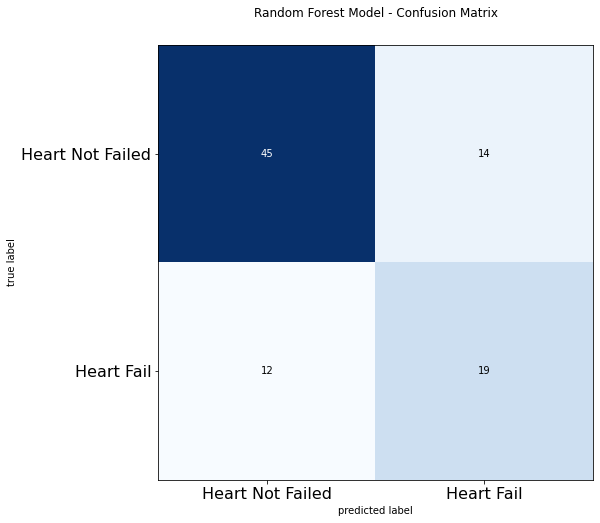

In [51]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

<strong> The confusion matrix is shown above for the true and false positives/negatives of heart fails.

## Support Vector Machines w/ Gaussian Kernel

<strong>Now we use the Support Vector Machines. Here, the kernel used is 'rbf'. We fit our train data to find the accuracy.

In [52]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
accuracies.append(100* svm_accuracy)
print("Accuracy of SVC is : ", "{:.2f}%".format(100* svm_accuracy))

Accuracy of SVC is :  72.22%


<strong> We can observe that we got the accuracy of 72 percent better than Logistic Regression, K-fold, and Random Forest classifier.

<Figure size 432x288 with 0 Axes>

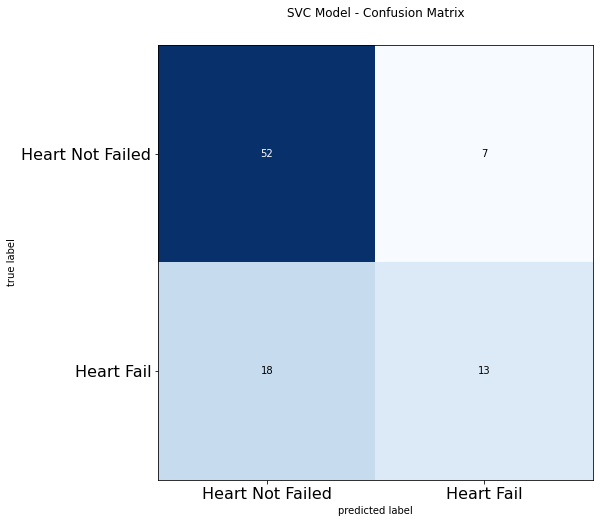

In [53]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

<strong>Likewise, the confusion matrix for the SVM is shown above for the true and false positives/negatives of heart fails.

## Gradient Boosting

<strong>Gradient Boosting classifiers take a group of weak learning models to create strong predictive model. In this example we calculate the accuracy, f1 score thus testing if Gradient Boosting classifier will be our best prediction model .

In [54]:
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=42)
gradientboost_clf.fit(X_train,y_train)
y_pred = gradientboost_clf.predict(X_test)
gradientboost_accurracy = accuracy_score(y_test, y_pred)
accuracies.append(100*gradientboost_accurracy)
print("Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_accurracy))
print(accuracies)

Accuracy of Gradient Boosting is :  71.11%
[71.11111111111111, 72.22222222222221, 71.11111111111111]


<Figure size 432x288 with 0 Axes>

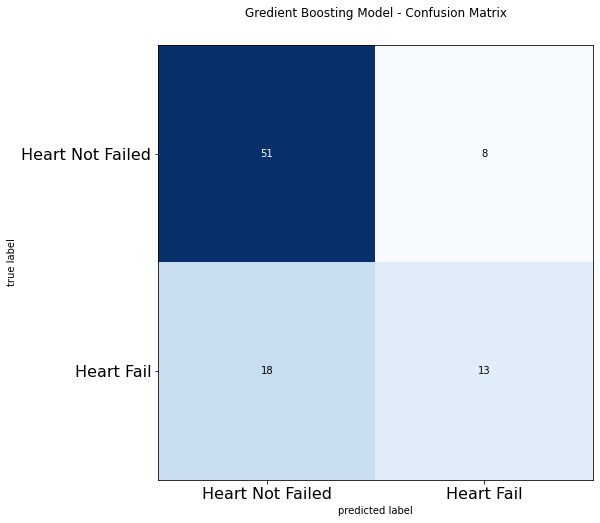

In [55]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gredient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

<strong>The confusion matrix is shown above used to calculate the precision.<br>
    Here, the accuracy id around 71%. So the accuracy turned out be the same as of SVM.

<strong>We now show in a graphical way the effectivenss or the comparision of differnt classifiers we have used so far.

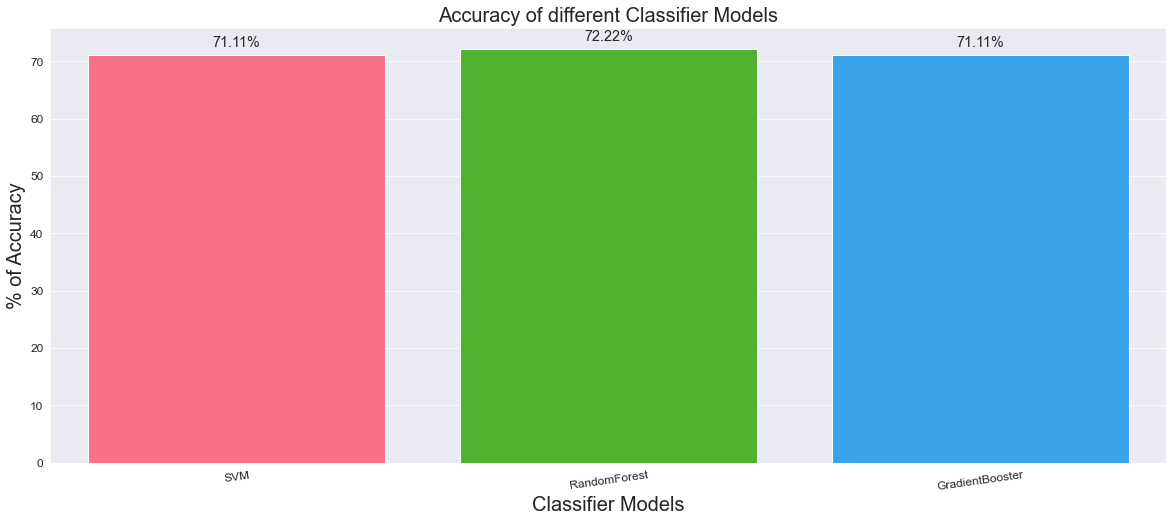

In [56]:
model_list = ['SVM','RandomForest','GradientBooster']
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracies, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

<strong>
    Hence, from the visualization of the accuracies of each models used for our example above, we can conclude that all the classifiers RandomForest, Support Vector Machine(SVM), and GradientBooster have almost the same accuracies of about 71 percent.

# Extra Work: Survival Analysis

<strong>We do the survival analysis by using the CoxPHFitter from the library lifelines in python.<br>
We do this to find the most significant features that are related to our label DEATH_EVENT
 
    

In [57]:
data = df
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<strong>
    We use the Cox Proportional Hazards Model (CoxPHFitter) to fit the data with the durations as the time variable and the DEATH_EVENT as the event feature/label.

In [58]:
cph =  CoxPHFitter()
cph.fit(data,"time", event_col = "DEATH_EVENT")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -468.23
         time fit was run = 2020-11-30 03:40:26 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                        0.05       1.05       0.01             0.03             0.06                 1.03                 1.07
anaemia                    0.46       1.58       0.22             0.04             0.89                 1.04                 2.42
creatinine_phosphokinase   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
diabetes                   0.14       1.15       0.22            -0.30             0.58                 0.74                 1.78
ejection_fraction         -0.05       0.95       0.01            -0.07            -0.03                 0.93                 0.97
high_blood_pressure        0.48       1.61       0.22             0.05             0.90                 1.05                 2.46
platelets                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine           0.32       1.38       0.07             0.18             0.46                 1.20                 1.58
serum_sodium              -0.04       0.96       0.02            -0.09             0.00                 0.91                 1.00
sex                       -0.24       0.79       0.25            -0.73             0.26                 0.48                 1.29
smoking                    0.13       1.14       0.25            -0.36             0.62                 0.70                 1.86

                             z      p   -log2(p)
covariate                                       
age                       4.98 <0.005      20.56
anaemia                   2.12   0.03       4.89
creatinine_phosphokinase  2.23   0.03       5.26
diabetes                  0.63   0.53       0.91
ejection_fraction        -4.67 <0.005      18.35
high_blood_pressure       2.20   0.03       5.17
platelets                -0.41   0.68       0.56
serum_creatinine          4.58 <0.005      17.68
serum_sodium             -1.90   0.06       4.12
sex                      -0.94   0.35       1.53
smoking                   0.51   0.61       0.72
---
Concordance = 0.74
Partial AIC = 958.46
log-likelihood ratio test = 81.95 on 11 df
-log2(p) of ll-ratio test = 40.56

<strong>
    From the summary of the CoxPHFitter above, we can see that the p-scores of the features 'age', 'ejection_fraction' and 'serum_sodium' are less than 0.005 hence making them the best variables to use for yeilding better accuracies.

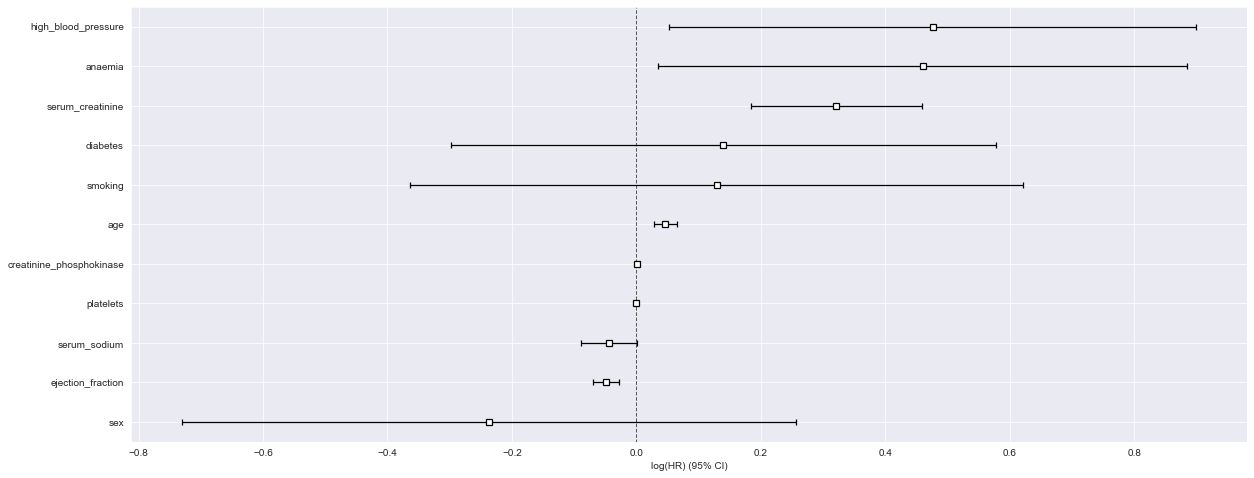

In [59]:
cph.plot()

<strong>
    The plotting of the coefficients of the fitted model of each features in the dataset is shown above.

<strong> Plotting the survival function from the data for a slice of tuples for visualizations.


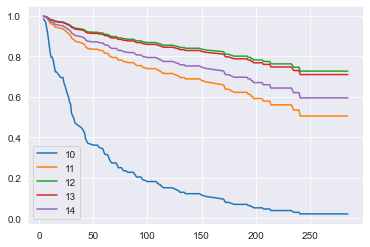

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
d_data = data.iloc[10:15, :]
cph.predict_survival_function(d_data).plot()

<strong>
    The graph for the survival funciton of a slice of objects [10:15] is plotted above.
    This shows the survival curves when we vary the covariative feature time with DEATH_EVENT as our label.